<a href="https://colab.research.google.com/github/atharv-d21/regression_house_price/blob/main/github_regression_predict_house_price.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [47]:
# importing libraries
import tensorflow as tf
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [48]:
# loading the training data from csv file to a dataframe format
df = pd.read_csv('https://raw.githubusercontent.com/atharv-d21/regression_house_price/refs/heads/main/Data/train.csv')
df

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1455,1456,60,RL,62.0,7917,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,8,2007,WD,Normal,175000
1456,1457,20,RL,85.0,13175,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,MnPrv,NaN,0,2,2010,WD,Normal,210000
1457,1458,70,RL,66.0,9042,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,GdPrv,Shed,2500,5,2010,WD,Normal,266500
1458,1459,20,RL,68.0,9717,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,4,2010,WD,Normal,142125


In [49]:
# filling all the null values with zeros
df = df.fillna(0)
df

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,0,Reg,Lvl,AllPub,...,0,0,0,0,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,0,Reg,Lvl,AllPub,...,0,0,0,0,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,0,IR1,Lvl,AllPub,...,0,0,0,0,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,0,IR1,Lvl,AllPub,...,0,0,0,0,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,0,IR1,Lvl,AllPub,...,0,0,0,0,0,12,2008,WD,Normal,250000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1455,1456,60,RL,62.0,7917,Pave,0,Reg,Lvl,AllPub,...,0,0,0,0,0,8,2007,WD,Normal,175000
1456,1457,20,RL,85.0,13175,Pave,0,Reg,Lvl,AllPub,...,0,0,MnPrv,0,0,2,2010,WD,Normal,210000
1457,1458,70,RL,66.0,9042,Pave,0,Reg,Lvl,AllPub,...,0,0,GdPrv,Shed,2500,5,2010,WD,Normal,266500
1458,1459,20,RL,68.0,9717,Pave,0,Reg,Lvl,AllPub,...,0,0,0,0,0,4,2010,WD,Normal,142125


In [50]:
# one-hot encoding the training data for the model
df = pd.get_dummies(df)
df

,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,...,SaleType_ConLw,SaleType_New,SaleType_Oth,SaleType_WD,SaleCondition_Abnorml,SaleCondition_AdjLand,SaleCondition_Alloca,SaleCondition_Family,SaleCondition_Normal,SaleCondition_Partial
0,1,60,65.0,8450,7,5,2003,2003,196.0,706,...,False,False,False,True,False,False,False,False,True,False
1,2,20,80.0,9600,6,8,1976,1976,0.0,978,...,False,False,False,True,False,False,False,False,True,False
2,3,60,68.0,11250,7,5,2001,2002,162.0,486,...,False,False,False,True,False,False,False,False,True,False
3,4,70,60.0,9550,7,5,1915,1970,0.0,216,...,False,False,False,True,True,False,False,False,False,False
4,5,60,84.0,14260,8,5,2000,2000,350.0,655,...,False,False,False,True,False,False,False,False,True,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1455,1456,60,62.0,7917,6,5,1999,2000,0.0,0,...,False,False,False,True,False,False,False,False,True,False
1456,1457,20,85.0,13175,6,6,1978,1988,119.0,790,...,False,False,False,True,False,False,False,False,True,False
1457,1458,70,66.0,9042,7,9,1941,2006,0.0,275,...,False,False,False,True,False,False,False,False,True,False
1458,1459,20,68.0,9717,5,6,1950,1996,0.0,49,...,False,False,False,True,False,False,False,False,True,False


In [51]:
# replacing true with 1 and false with 0 to convert the data frame into completely numerical form
df = df.replace({True: 1, False: 0})
df

<ipython-input-51-8290ebbd9f75>:2: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df = df.replace({True: 1, False: 0})


,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,...,SaleType_ConLw,SaleType_New,SaleType_Oth,SaleType_WD,SaleCondition_Abnorml,SaleCondition_AdjLand,SaleCondition_Alloca,SaleCondition_Family,SaleCondition_Normal,SaleCondition_Partial
0,1,60,65.0,8450,7,5,2003,2003,196.0,706,...,0,0,0,1,0,0,0,0,1,0
1,2,20,80.0,9600,6,8,1976,1976,0.0,978,...,0,0,0,1,0,0,0,0,1,0
2,3,60,68.0,11250,7,5,2001,2002,162.0,486,...,0,0,0,1,0,0,0,0,1,0
3,4,70,60.0,9550,7,5,1915,1970,0.0,216,...,0,0,0,1,1,0,0,0,0,0
4,5,60,84.0,14260,8,5,2000,2000,350.0,655,...,0,0,0,1,0,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1455,1456,60,62.0,7917,6,5,1999,2000,0.0,0,...,0,0,0,1,0,0,0,0,1,0
1456,1457,20,85.0,13175,6,6,1978,1988,119.0,790,...,0,0,0,1,0,0,0,0,1,0
1457,1458,70,66.0,9042,7,9,1941,2006,0.0,275,...,0,0,0,1,0,0,0,0,1,0
1458,1459,20,68.0,9717,5,6,1950,1996,0.0,49,...,0,0,0,1,0,0,0,0,1,0


In [52]:
# making features and labels out of the dataframe for the model
trainingX = df.drop(columns=['SalePrice', 'Id'])
trainingY = df['SalePrice']

In [53]:
# making a linear regression model to make predictions
model =  tf.keras.Sequential({
    tf.keras.layers.Dense(100, activation='relu'),
    tf.keras.layers.Dense(100, activation='relu'),
    tf.keras.layers.Dense(100, activation='relu'),
    tf.keras.layers.Dense(1)
})

In [54]:
# compiling the model and setting up the loss function,  optimizer and learning rate
model.compile(loss=tf.keras.losses.MAE, optimizer = tf.keras.optimizers.Adam())

In [55]:
# using learing rate scheduler to determine the optimal learning rate for our model
lr_scheduler = tf.keras.callbacks.LearningRateScheduler(
    lambda epoch: 1e-4 * 10**(epoch / 20)
)

In [56]:
# fitting our model with training data for 100 epochs
history = model.fit(trainingX, trainingY, epochs=100, callbacks=[lr_scheduler])

Epoch 1/100
46/46 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - loss: 180151.2969 - learning_rate: 1.0000e-04
Epoch 2/100
46/46 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 180590.0625 - learning_rate: 1.1220e-04
Epoch 3/100
46/46 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 178790.6719 - learning_rate: 1.2589e-04
Epoch 4/100
46/46 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 179292.0781 - learning_rate: 1.4125e-04
Epoch 5/100
46/46 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 179201.3281 - learning_rate: 1.5849e-04
Epoch 6/100
46/46 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 178286.3438 - learning_rate: 1.7783e-04
Epoch 7/100
46/46 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 173459.6250 - learning_rate: 1.9953e-04
Epoch 8/100
46/46 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 165944.9062 - learning_rate: 2.2387e-04
Epoch 9/100
46/46 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 153221.0312 - learning_rate: 2.5119e-04
Epoch 10/100
46/46 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 133636.8906 - learning_rate: 2.8184e-04
Epoch 11/

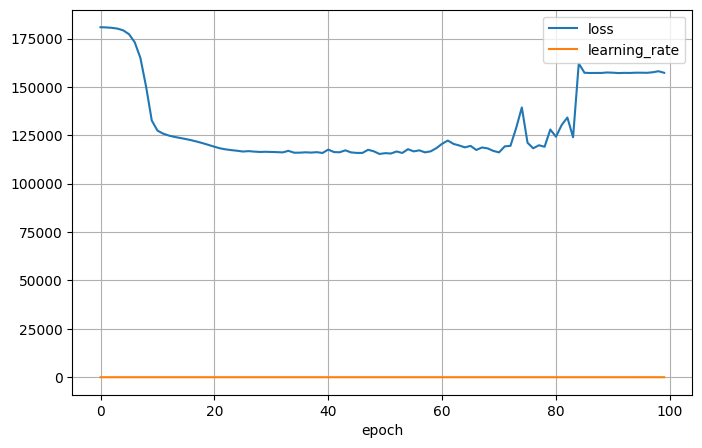

In [57]:
# ploting
pd.DataFrame(history.history).plot(figsize=(8, 5), xlabel='epoch')
plt.grid(True)
plt.show()

Text(0, 0.5, 'loss')

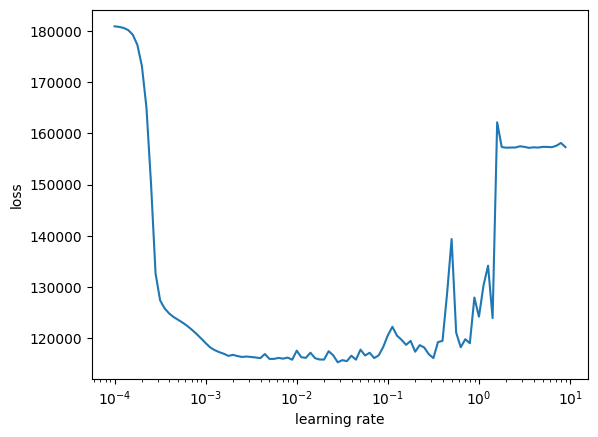

In [58]:
# plotting the learning rate vs loss
lrs = 1e-4 * (10 ** (np.arange(100) / 20))
plt.semilogx(lrs, history.history['loss'])
plt.xlabel('learning rate')
plt.ylabel('loss')

Using above obersations we can say that the most optimal leaning rate for our model is 0.014125.
<br>Note: This observation may varry durring re-runs of the code blocks but I have recorded the most consistant observation value which gives us optimal most minimal loss values durring fitting.

In [59]:
# making a linear regression model with most optimal parameters for our dataset
model_1 = tf.keras.Sequential({
    tf.keras.layers.Dense(303, activation='relu'),
    tf.keras.layers.Dense(203, activation='relu'),
    tf.keras.layers.Dense(135, activation='relu'),
    tf.keras.layers.Dense(90, activation='relu'),
    tf.keras.layers.Dense(60, activation='relu'),
    tf.keras.layers.Dense(40, activation='relu'),
    tf.keras.layers.Dense(1)
})

In [60]:
# compiling our new model with the optimal learning rate
model_1.compile(loss=tf.keras.losses.MAE, optimizer=tf.keras.optimizers.Adam(0.014125))

In [61]:
# fitting our model with training data for 150 epochs
history_1 = model_1.fit(trainingX, trainingY, epochs=150)

Epoch 1/150
46/46 ━━━━━━━━━━━━━━━━━━━━ 26s 5ms/step - loss: 134762.5938
Epoch 2/150
46/46 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 39527.3320
Epoch 3/150
46/46 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 28458.2188
Epoch 4/150
46/46 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 30706.3496
Epoch 5/150
46/46 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 27162.0527
Epoch 6/150
46/46 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 30837.6289
Epoch 7/150
46/46 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 29181.7676
Epoch 8/150
46/46 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 37297.4727
Epoch 9/150
46/46 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 30386.4160
Epoch 10/150
46/46 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 28081.0176
Epoch 11/150
46/46 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 29586.0039
Epoch 12/150
46/46 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 29178.0254
Epoch 13/150
46/46 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 24462.6543
Epoch 14/150
46/46 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 25538.1836
Epoch 15/150


In [62]:
# loading in the test dataset as dataframe
df1 = pd.read_csv('https://raw.githubusercontent.com/atharv-d21/regression_house_price/refs/heads/main/Data/test.csv')
df1

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition
0,1461,20,RH,80.0,11622,Pave,NaN,Reg,Lvl,AllPub,...,120,0,NaN,MnPrv,NaN,0,6,2010,WD,Normal
1,1462,20,RL,81.0,14267,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,NaN,Gar2,12500,6,2010,WD,Normal
2,1463,60,RL,74.0,13830,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,MnPrv,NaN,0,3,2010,WD,Normal
3,1464,60,RL,78.0,9978,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,NaN,NaN,0,6,2010,WD,Normal
4,1465,120,RL,43.0,5005,Pave,NaN,IR1,HLS,AllPub,...,144,0,NaN,NaN,NaN,0,1,2010,WD,Normal
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1454,2915,160,RM,21.0,1936,Pave,NaN,Reg,Lvl,AllPub,...,0,0,NaN,NaN,NaN,0,6,2006,WD,Normal
1455,2916,160,RM,21.0,1894,Pave,NaN,Reg,Lvl,AllPub,...,0,0,NaN,NaN,NaN,0,4,2006,WD,Abnorml
1456,2917,20,RL,160.0,20000,Pave,NaN,Reg,Lvl,AllPub,...,0,0,NaN,NaN,NaN,0,9,2006,WD,Abnorml
1457,2918,85,RL,62.0,10441,Pave,NaN,Reg,Lvl,AllPub,...,0,0,NaN,MnPrv,Shed,700,7,2006,WD,Normal


In [63]:
# filling the null values with zeros
df1.fillna(0)
df1

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition
0,1461,20,RH,80.0,11622,Pave,NaN,Reg,Lvl,AllPub,...,120,0,NaN,MnPrv,NaN,0,6,2010,WD,Normal
1,1462,20,RL,81.0,14267,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,NaN,Gar2,12500,6,2010,WD,Normal
2,1463,60,RL,74.0,13830,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,MnPrv,NaN,0,3,2010,WD,Normal
3,1464,60,RL,78.0,9978,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,NaN,NaN,0,6,2010,WD,Normal
4,1465,120,RL,43.0,5005,Pave,NaN,IR1,HLS,AllPub,...,144,0,NaN,NaN,NaN,0,1,2010,WD,Normal
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1454,2915,160,RM,21.0,1936,Pave,NaN,Reg,Lvl,AllPub,...,0,0,NaN,NaN,NaN,0,6,2006,WD,Normal
1455,2916,160,RM,21.0,1894,Pave,NaN,Reg,Lvl,AllPub,...,0,0,NaN,NaN,NaN,0,4,2006,WD,Abnorml
1456,2917,20,RL,160.0,20000,Pave,NaN,Reg,Lvl,AllPub,...,0,0,NaN,NaN,NaN,0,9,2006,WD,Abnorml
1457,2918,85,RL,62.0,10441,Pave,NaN,Reg,Lvl,AllPub,...,0,0,NaN,MnPrv,Shed,700,7,2006,WD,Normal


In [64]:
# one-hot encoding the test dataframe
df1 = pd.get_dummies(df1)
df1

,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,...,SaleType_ConLw,SaleType_New,SaleType_Oth,SaleType_WD,SaleCondition_Abnorml,SaleCondition_AdjLand,SaleCondition_Alloca,SaleCondition_Family,SaleCondition_Normal,SaleCondition_Partial
0,1461,20,80.0,11622,5,6,1961,1961,0.0,468.0,...,False,False,False,True,False,False,False,False,True,False
1,1462,20,81.0,14267,6,6,1958,1958,108.0,923.0,...,False,False,False,True,False,False,False,False,True,False
2,1463,60,74.0,13830,5,5,1997,1998,0.0,791.0,...,False,False,False,True,False,False,False,False,True,False
3,1464,60,78.0,9978,6,6,1998,1998,20.0,602.0,...,False,False,False,True,False,False,False,False,True,False
4,1465,120,43.0,5005,8,5,1992,1992,0.0,263.0,...,False,False,False,True,False,False,False,False,True,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1454,2915,160,21.0,1936,4,7,1970,1970,0.0,0.0,...,False,False,False,True,False,False,False,False,True,False
1455,2916,160,21.0,1894,4,5,1970,1970,0.0,252.0,...,False,False,False,True,True,False,False,False,False,False
1456,2917,20,160.0,20000,5,7,1960,1996,0.0,1224.0,...,False,False,False,True,True,False,False,False,False,False
1457,2918,85,62.0,10441,5,5,1992,1992,0.0,337.0,...,False,False,False,True,False,False,False,False,True,False


In [65]:
# replacing all true and false values with 1s and 0s respectively
df1.replace({True: 1, False: 0}, inplace=True)
df1

<ipython-input-65-c6ffbefcea7c>:2: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df1.replace({True: 1, False: 0}, inplace=True)


,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,...,SaleType_ConLw,SaleType_New,SaleType_Oth,SaleType_WD,SaleCondition_Abnorml,SaleCondition_AdjLand,SaleCondition_Alloca,SaleCondition_Family,SaleCondition_Normal,SaleCondition_Partial
0,1461,20,80.0,11622,5,6,1961,1961,0.0,468.0,...,0,0,0,1,0,0,0,0,1,0
1,1462,20,81.0,14267,6,6,1958,1958,108.0,923.0,...,0,0,0,1,0,0,0,0,1,0
2,1463,60,74.0,13830,5,5,1997,1998,0.0,791.0,...,0,0,0,1,0,0,0,0,1,0
3,1464,60,78.0,9978,6,6,1998,1998,20.0,602.0,...,0,0,0,1,0,0,0,0,1,0
4,1465,120,43.0,5005,8,5,1992,1992,0.0,263.0,...,0,0,0,1,0,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1454,2915,160,21.0,1936,4,7,1970,1970,0.0,0.0,...,0,0,0,1,0,0,0,0,1,0
1455,2916,160,21.0,1894,4,5,1970,1970,0.0,252.0,...,0,0,0,1,1,0,0,0,0,0
1456,2917,20,160.0,20000,5,7,1960,1996,0.0,1224.0,...,0,0,0,1,1,0,0,0,0,0
1457,2918,85,62.0,10441,5,5,1992,1992,0.0,337.0,...,0,0,0,1,0,0,0,0,1,0


In [66]:
# recording Ids before dropping them
ids = df1['Id']

In [67]:
# adding missing features from training dataframe
# Get missing columns in df1
missing_cols = set(trainingX.columns) - set(df1.columns)

# Add a missing column in df1 with default value of 0
for c in missing_cols:
    df1[c] = 0

# Ensure the order of column in df1 is the same as trainingX
df1 = df1[trainingX.columns]
df1

,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,...,SaleType_ConLw,SaleType_New,SaleType_Oth,SaleType_WD,SaleCondition_Abnorml,SaleCondition_AdjLand,SaleCondition_Alloca,SaleCondition_Family,SaleCondition_Normal,SaleCondition_Partial
0,20,80.0,11622,5,6,1961,1961,0.0,468.0,144.0,...,0,0,0,1,0,0,0,0,1,0
1,20,81.0,14267,6,6,1958,1958,108.0,923.0,0.0,...,0,0,0,1,0,0,0,0,1,0
2,60,74.0,13830,5,5,1997,1998,0.0,791.0,0.0,...,0,0,0,1,0,0,0,0,1,0
3,60,78.0,9978,6,6,1998,1998,20.0,602.0,0.0,...,0,0,0,1,0,0,0,0,1,0
4,120,43.0,5005,8,5,1992,1992,0.0,263.0,0.0,...,0,0,0,1,0,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1454,160,21.0,1936,4,7,1970,1970,0.0,0.0,0.0,...,0,0,0,1,0,0,0,0,1,0
1455,160,21.0,1894,4,5,1970,1970,0.0,252.0,0.0,...,0,0,0,1,1,0,0,0,0,0
1456,20,160.0,20000,5,7,1960,1996,0.0,1224.0,0.0,...,0,0,0,1,1,0,0,0,0,0
1457,85,62.0,10441,5,5,1992,1992,0.0,337.0,0.0,...,0,0,0,1,0,0,0,0,1,0


In [71]:
# making prediction on our testing dataframe
prediction = model_1.predict(df1)
prediction = pd.DataFrame(prediction)
prediction = prediction.fillna(180000)
prediction

46/46 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step


,0
0,125158.710938
1,127388.718750
2,187966.671875
3,192661.640625
4,173540.468750
...,...
1454,180000.000000
1455,87574.304688
1456,163698.921875
1457,180000.000000


In [74]:
# converting prediction into a 1D array
prediction = prediction.to_numpy().flatten()
prediction

array([125158.71, 127388.72, 187966.67, ..., 163698.92, 180000.  ,
       202507.92], dtype=float32)

In [75]:
submission = pd.DataFrame({
    'Id': ids,
    'SalePrice': prediction
})
submission

,Id,SalePrice
0,1461,125158.710938
1,1462,127388.718750
2,1463,187966.671875
3,1464,192661.640625
4,1465,173540.468750
...,...,...
1454,2915,180000.000000
1455,2916,87574.304688
1456,2917,163698.921875
1457,2918,180000.000000


In [76]:
# exporting our submission in csv file format
submission.to_csv('submission.csv', index=False)